# ML Urban Sound Project

Hope McIntyre, Jason Adams, Shannon Mitchell

Data Source:
J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

In [8]:
# Base
import numpy as np
import pandas as pd
import json
import re
import string
from os import listdir
import math
import time
import csv
import sys
import datetime

# Sound Engineering
import subprocess
import wave
import struct
from scipy.io import wavfile

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Webscraping
from bs4 import BeautifulSoup
# import urllib.request

In [9]:
pwd

u'/Users/hopeemac/Documents/Code/GIT/ML_UrbanSounds'

In [10]:
# Directory of Sound Files
dataFilepath = '/Volumes/FreeAgent GoFlex Drive/Data Sets/UrbanSound/data'
dataloc = '/Volumes/FreeAgent GoFlex Drive/Data Sets/UrbanSound/data'

In [12]:
# Get names of Classes
classes = listdir(dataloc)
classes = [x for x in classes if x !='.DS_Store']
classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [25]:
# Get JSON Files
jsonFilesAll = {}
for folder in classes:
    print(folder)
    files = listdir(dataFilepath+'/'+folder)
    jsonFiles = [f for f in files if '.json' in f]
    #print(len(files))
    #print(len(jsonFiles))
    for f in jsonFiles:
        print 'loading '+file
        with open(dataFilepath+'/'+folder+'/'+f) as data_file:    
            jsonFilesAll[f] = json.load(data_file)

air_conditioner
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.json
loading 63261.j

In [26]:
jsonFilesAll['63261.json']

{u'analysis_frames': u'http://www.freesound.org/data/analysis/63/63261_321967_frames.json',
 u'analysis_stats': u'http://www.freesound.org/api/sounds/63261/analysis/',
 u'avg_rating': 8.25,
 u'bitdepth': 16,
 u'bitrate': 1411,
 u'channels': 2,
 u'created': u'2008-11-17 21:45:54',
 u'description': u'Happy dog waiting for his friend barkink. Rec by zoom H2',
 u'duration': 7.01591836735,
 u'filesize': 1238518,
 u'id': 63261,
 u'license': u'http://creativecommons.org/licenses/by-nc/3.0/',
 u'num_comments': 4,
 u'num_downloads': 397,
 u'num_ratings': 4,
 u'original_filename': u'00571 happy barking dog 1.wav',
 u'pack': u'http://www.freesound.org/api/packs/4026/',
 u'preview-hq-mp3': u'http://www.freesound.org/data/previews/63/63261_321967-hq.mp3',
 u'preview-hq-ogg': u'http://www.freesound.org/data/previews/63/63261_321967-hq.ogg',
 u'preview-lq-mp3': u'http://www.freesound.org/data/previews/63/63261_321967-lq.mp3',
 u'preview-lq-ogg': u'http://www.freesound.org/data/previews/63/63261_32196

In [28]:
metaDF = pd.DataFrame.from_dict(jsonFilesAll, orient = 'index'); metaDF[0:10]

,similarity,num_ratings,duration,samplerate,preview-hq-ogg,id,preview-lq-ogg,bitdepth,num_comments,filesize,...,created,url,type,avg_rating,preview-lq-mp3,original_filename,waveform_l,waveform_m,pack,geotag
100032.json,http://www.freesound.org/api/sounds/100032/sim...,3,0.317551,44100.0,http://www.freesound.org/data/previews/100/100...,100032,http://www.freesound.org/data/previews/100/100...,16,0,56060,...,2010-06-26 10:26:20,http://www.freesound.org/people/nfrae/sounds/1...,wav,7.000000,http://www.freesound.org/data/previews/100/100...,rose_bark.wav,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,NaN,NaN
100263.json,http://www.freesound.org/api/sounds/100263/sim...,5,394.650317,44100.0,http://www.freesound.org/data/previews/100/100...,100263,http://www.freesound.org/data/previews/100/100...,16,2,69616360,...,2010-06-25 17:36:57,http://www.freesound.org/people/sagetyrtle/sou...,wav,9.600000,http://www.freesound.org/data/previews/100/100...,062510_park.wav,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,NaN,NaN
100648.json,http://www.freesound.org/api/sounds/100648/sim...,1,71.340400,44100.0,http://www.freesound.org/data/previews/100/100...,100648,http://www.freesound.org/data/previews/100/100...,0,0,1143967,...,2010-07-02 21:29:38,http://www.freesound.org/people/Unice.ys/sound...,mp3,8.000000,http://www.freesound.org/data/previews/100/100...,Shanghai Nanjing Road 20100606_02.mp3,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,NaN,"{u'lat': 31.2355387018, u'lon': 121.477227509}"
100652.json,http://www.freesound.org/api/sounds/100652/sim...,2,11.912900,44100.0,http://www.freesound.org/data/previews/100/100...,100652,http://www.freesound.org/data/previews/100/100...,0,0,191032,...,2010-07-02 21:30:04,http://www.freesound.org/people/miastodzwiekow...,mp3,4.000000,http://www.freesound.org/data/previews/100/100...,sobieszow_barking dog1_280610.mp3,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/api/packs/4855/,"{u'lat': 50.8391452954, u'lon': 15.6347036362}"
100795.json,http://www.freesound.org/api/sounds/100795/sim...,0,22.231300,44100.0,http://www.freesound.org/data/previews/100/100...,100795,http://www.freesound.org/data/previews/100/100...,0,0,356126,...,2010-07-04 12:49:09,http://www.freesound.org/people/miastodzwiekow...,mp3,0.000000,http://www.freesound.org/data/previews/100/100...,echo_barking dog020710.mp3,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/api/packs/4855/,"{u'lat': 50.8416046488, u'lon': 15.6352829933}"
100852.json,http://www.freesound.org/api/sounds/100852/sim...,0,64.680200,44100.0,http://www.freesound.org/data/previews/100/100...,100852,http://www.freesound.org/data/previews/100/100...,0,0,1553138,...,2010-07-10 00:22:22,http://www.freesound.org/people/edbles/sounds/...,mp3,0.000000,http://www.freesound.org/data/previews/100/100...,businsidehum.mp3,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/data/displays/100/100...,http://www.freesound.org/api/packs/6446/,NaN
101281.json,http://www.freesound.org/api/sounds/101281/sim...,0,87.041100,44100.0,http://www.freesound.org/data/previews/101/101...,101281,http://www.freesound.org/data/previews/101/101...,0,0,1393083,...,2010-07-13 19:19:27,http://www.freesound.org/people/miastodzwiekow...,mp3,0.000000,http://www.freesound.org/data/previews/101/101...,biedronka_supermarket100710.mp3,http://www.freesound.org/data/displays/101/101...,http://www.freesound.org/data/displays/101/101...,http://www.freesound.org/api/packs/5242/,"{u'lat': 52.3947890978, u'lon': 16.9216275215}"
101382.json,http://www.freesound.org/api/sounds/101382/sim...,27,97.918750,48000.0,http://www.freesound.org/data/previews/101/101...,101382,http://www.freesound.org/d

In [20]:
# Get names of Classes
classes = listdir(dataloc)
classes = [x for x in classes if x !='.DS_Store']
classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [5]:
# Get Wave Files
wavFilesAll = {}
for folder in classes:
    print(folder)
    files = listdir(dataFilepath+'/'+folder)
    wavFiles = [f for f in files if '.wav' in f]
    print(len(files))
    print(len(wavFiles))
    for f in wavFiles:
        wavFilesAll[f]= folder
    # wavFiles = [x for x in files if '.wav' in x]
    # wavFilesAll[folder] = wavFiles

air_conditioner
193
39
car_horn
376
104
children_playing
475
121
dog_bark
1012
221
drilling
358
88
engine_idling
292
67
gun_shot
352
94
jackhammer
136
31
siren
223
60
street_music
499
100


In [6]:
# Need to Add Data Extraction for .mp3 and .aif

In [7]:
len(wavFilesAll.keys())

922

In [8]:
set(wavFilesAll.values())

{'air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music'}

In [53]:
category = 'dog_bark'
clip = wavFilesAll[category][0]
clip

'100032.wav'

In [6]:
wav_file = '98525.wav'

In [3]:
pwd

'/Users/hopeemac/Documents/Code/GIT/ML_UrbanSounds'

In [9]:
fs, data = wavfile.read(wav_file)

In [12]:
len(data)

248404

In [9]:
# Source: http://www.christianpeccei.com/musicmap/
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [47]:
m = moments(data); m # mean, std, skewness, kurtosis

[35.316919212251008,
 7014.1933273996192,
 -0.14039180791824996,
 4.0072501067894581]

In [10]:
# Source: http://www.christianpeccei.com/musicmap/
def fftfeatures(wavdata):
    f = np.fft.fft(wavdata)
    f = f[2:(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = np.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [49]:
f = fftfeatures(data); f # power1 - power10

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[0.031387378042524387,
 0.048165233869194191,
 0.078013677228059936,
 0.081011470769850213,
 0.1113063662739676,
 0.11562214183983503,
 0.12338568865394266,
 0.13956849534218005,
 0.15155688972732106,
 0.11998265825312487]

In [51]:
feat = {}

In [62]:
feat[wav_file] = {}
feat[wav_file]['mean'] = m[0] 
feat[wav_file]['std'] = m[1] 
feat[wav_file]['skewness'] = m[2] 
feat[wav_file]['kurtosis'] = m[3]
feat[wav_file]['power1'] = f[0]
feat[wav_file]['power2'] = f[1]
feat[wav_file]['power3'] = f[2]
feat[wav_file]['power4'] = f[3]
feat[wav_file]['power5'] = f[4]
feat[wav_file]['power6'] = f[5]
feat[wav_file]['power7'] = f[6]
feat[wav_file]['power8'] = f[7]
feat[wav_file]['power9'] = f[8]
feat[wav_file]['power10'] = f[9]
feat[wav_file]['class'] = 

In [63]:
feat

{'98525.wav': {'kurtosis': 4.0072501067894581,
  'mean': 35.316919212251008,
  'power1': 0.031387378042524387,
  'power10': 0.11998265825312487,
  'power2': 0.048165233869194191,
  'power3': 0.078013677228059936,
  'power4': 0.081011470769850213,
  'power5': 0.1113063662739676,
  'power6': 0.11562214183983503,
  'power7': 0.12338568865394266,
  'power8': 0.13956849534218005,
  'power9': 0.15155688972732106,
  'skewness': -0.14039180791824996,
  'std': 7014.1933273996192}}

In [69]:
featDF = pd.DataFrame.from_dict(feat, orient = 'index'); featDF

,mean,power7,power9,power1,power5,power8,power4,power10,power3,skewness,std,power6,kurtosis,power2
98525.wav,35.316919,0.123386,0.151557,0.031387,0.111306,0.139568,0.081011,0.119983,0.078014,-0.140392,7014.193327,0.115622,4.00725,0.048165


In [11]:
def getDataFeatures(wav_file, category):
    print(wav_file)
    wav_file = dataloc+"/"+category+'/'+wav_file
    try:
        fs, data = wavfile.read(wav_file)
        m = moments(data)
        f = fftfeatures(data)
    except:
        m = [np.NaN]*4
        f = [np.NaN]*10
    features = {}
    features['mean'] = m[0] 
    features['std'] = m[1] 
    features['skewness'] = m[2] 
    features['kurtosis'] = m[3]
    features['power1'] = f[0]
    features['power2'] = f[1]
    features['power3'] = f[2]
    features['power4'] = f[3]
    features['power5'] = f[4]
    features['power6'] = f[5]
    features['power7'] = f[6]
    features['power8'] = f[7]
    features['power9'] = f[8]
    features['power10'] = f[9]
    features['class'] = category
    return features

In [15]:
start = datetime.datetime.now(); str(start)

'2016-04-18 10:12:36.473890'

In [12]:
feat = {}
count = 0
for file, category in wavFilesAll.items():
    count += 1
    print(count)
    start = datetime.datetime.now()
    feat[file] = getDataFeatures(file, category)
    runtime = datetime.datetime.now() - start
    print(str(runtime))

128470.wav
0:00:00.342481
72538.wav
0:00:00.161340
34771.wav
0:00:00.680344

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Applications/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)



180937.wav
0:00:00.090720
196063.wav
0:00:00.175579
196060.wav
0:00:00.033642
115243.wav
0:00:04.470662
63932.wav
0:30:52.805657
46656.wav
0:00:00.421930
159439.wav
0:00:00.142951
175851.wav
0:00:00.058567
174276.wav
0:00:01.390830
164625.wav
0:00:00.163176
165640.wav
0:00:00.245656
34708.wav
0:00:00.519203
170564.wav
0:00:00.032244
14385.wav
0:00:01.113802
34952.wav
0:00:00.500464
25037.wav
0:00:00.097391
46918.wav
0:00:00.357657
164626.wav
0:00:00.068225
196066.wav
0:00:00.194428
133473.wav
0:00:00.611743
196085.wav
0:00:00.547189
89099.wav
0:00:00.062051
156091.wav
0:00:00.111750
96169.wav
0:00:00.079354
160092.wav
0:00:00.099362
164377.wav
0:00:00.027714
49974.wav
0:00:00.112239
46669.wav
0:00:03.812219
149177.wav
0:00:00.108715
84699.wav
0:00:00.672913
24728.wav
0:00:02.683463
82024.wav
0:00:01.020926
199261.wav
0:00:00.075760
193697.wav
0:00:00.054498
77247.wav
0:00:00.143831
71086.wav
0:00:00.024369
42117.wav
0:00:03.167190
155317.wav
0:00:00.145996
33641.wav
0:00:00.605867
442

In [13]:
len(feat)

922

In [ ]:
2+2

In [14]:
featDF = pd.DataFrame.from_dict(feat, orient = 'index'); featDF[0:5]

,std,mean,power2,power7,power5,kurtosis,skewness,power10,power4,power9,power6,power1,power8,class,power3
100032.wav,5387.262558,-0.173201,0.218719,0.021339,0.107915,8.378661,0.290676,0.004058,0.286047,0.007275,0.049451,0.030802,0.011321,dog_bark,0.263073
100263.wav,172.622405,-2.877835,0.077798,0.102353,0.091911,10.631201,-0.037141,0.094223,0.112095,0.095986,0.145623,0.082727,0.108314,children_playing,0.088970
101729.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,air_conditioner,NaN
101848.wav,1100.104596,-0.486906,0.170541,0.056053,0.109598,7.459590,-0.010953,0.053987,0.127636,0.050200,0.066393,0.156979,0.052119,street_music,0.156496
102102.wav,697.540407,-1.028463,0.058669,0.154061,0.125748,11.638605,0.204312,0.098656,0.118089,0.133428,0.113967,0.043734,0.075375,dog_bark,0.078275


In [15]:
featDF.to_csv("feature_quant.csv")

In [16]:
pwd

'/Users/hopeemac/Documents/Code/GIT/ML_UrbanSounds'

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


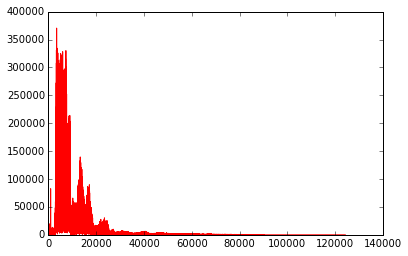

In [13]:
# Source: http://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read(wav_file) # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()